# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing the train_data

In [2]:
train_data = pd.read_csv("bank-additional-full.csv", na_values =['NA'])
columns = train_data.columns.values[0].split(';')
columns = [column.replace('"', '') for column in columns]
train_data = train_data.values
train_data = [items[0].split(';') for items in train_data]
train_data = pd.DataFrame(train_data,columns = columns)

train_data['job'] = train_data['job'].str.replace('"', '')
train_data['marital'] = train_data['marital'].str.replace('"', '')
train_data['education'] = train_data['education'].str.replace('"', '')
train_data['default'] = train_data['default'].str.replace('"', '')
train_data['housing'] = train_data['housing'].str.replace('"', '')
train_data['loan'] = train_data['loan'].str.replace('"', '')
train_data['contact'] = train_data['contact'].str.replace('"', '')
train_data['month'] = train_data['month'].str.replace('"', '')
train_data['day_of_week'] = train_data['day_of_week'].str.replace('"', '')
train_data['poutcome'] = train_data['poutcome'].str.replace('"', '')
train_data['y'] = train_data['y'].str.replace('"', '')

In [3]:
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


# Importing the test_data

In [4]:
test_data = pd.read_csv("bank-additional.csv", na_values =['NA'])
test_data = test_data.values
test_data = [items[0].split(';') for items in test_data]
test_data = pd.DataFrame(test_data,columns = columns)

test_data['job'] = test_data['job'].str.replace('"', '')
test_data['marital'] = test_data['marital'].str.replace('"', '')
test_data['education'] = test_data['education'].str.replace('"', '')
test_data['default'] = test_data['default'].str.replace('"', '')
test_data['housing'] = test_data['housing'].str.replace('"', '')
test_data['loan'] = test_data['loan'].str.replace('"', '')
test_data['contact'] = test_data['contact'].str.replace('"', '')
test_data['month'] = test_data['month'].str.replace('"', '')
test_data['day_of_week'] = test_data['day_of_week'].str.replace('"', '')
test_data['poutcome'] = test_data['poutcome'].str.replace('"', '')
test_data['y'] = test_data['y'].str.replace('"', '')

In [5]:
test_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,no


# Preprocessing the dataset

In [6]:
def categorize(df):
    data = df.copy()
    le = preprocessing.LabelEncoder()
    
    data['job'] = le.fit_transform(data['job'])
    data['marital'] = le.fit_transform(data['marital'])
    data['education'] = le.fit_transform(data['education'])
    data['default'] = le.fit_transform(data['default'])
    data['housing'] = le.fit_transform(data['housing'])
    data['month'] = le.fit_transform(data['month'])
    data['loan'] = le.fit_transform(data['loan'])
    data['contact'] = le.fit_transform(data['contact'])
    data['day_of_week'] = le.fit_transform(data['day_of_week'])
    data['poutcome'] = le.fit_transform(data['poutcome'])
    data['y'] = le.fit_transform(data['y'])
    return data

In [7]:
data_new = pd.concat([train_data,test_data])
data_new.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

# Checking the null values

In [8]:
data_new.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Data Visualization

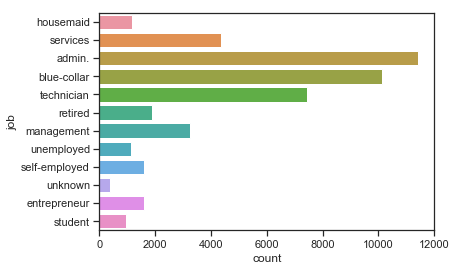

In [9]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data_new)

In [10]:
data_new = data_new[data_new.job != 'unknown']

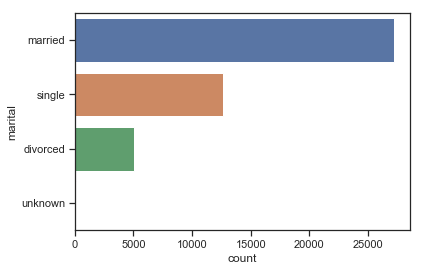

In [11]:
sns.countplot(y='marital', data=data_new)

In [12]:
data_new.marital.value_counts()

married     27175
single      12638
divorced     5043
unknown        82
Name: marital, dtype: int64

In [13]:
data_new = data_new[data_new.marital != 'unknown']
data_new = data_new[data_new.loan != 'unknown']

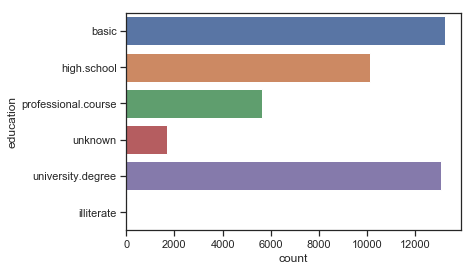

In [14]:
sns.countplot(y='education', data=data_new)

In [15]:
data_new = data_new[data_new.education != 'illiterate']

In [16]:
data_new.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,43748,43748,43748,43748,43748,43748,43748,43748,43748,43748,...,43748,43748,43748,43748,43748,43748,43748,43748,43748,43748
unique,78,11,3,5,3,2,2,2,10,5,...,41,27,8,3,10,26,26,316,11,2
top,31,admin.,married,basic,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,no
freq,2079,11174,26508,13231,34778,23514,36912,27915,14595,9160,...,18731,42139,37748,37748,17239,8157,8157,3027,17239,38828


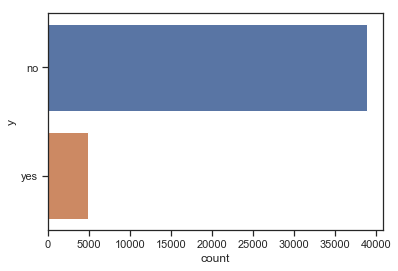

In [17]:
sns.countplot(y='y', data=data_new)

# From this we see that the data is unbalanced

In [18]:
data_new = categorize(data_new)
data_new = data_new.convert_objects(convert_numeric=True)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


# Outliers Detection

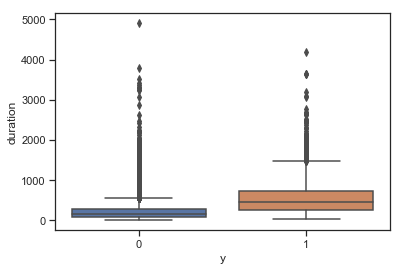

In [19]:
sns.boxplot(x='y', y='duration', data=data_new)

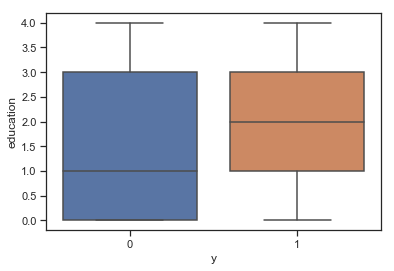

In [20]:
sns.boxplot(x='y', y='education', data=data_new)

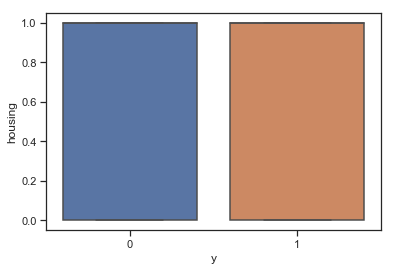

In [21]:
sns.boxplot(x='y', y='housing', data=data_new)

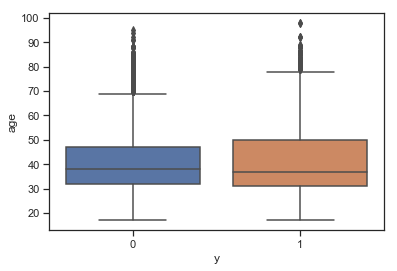

In [22]:
sns.boxplot(data_new['y'],data_new['age'])

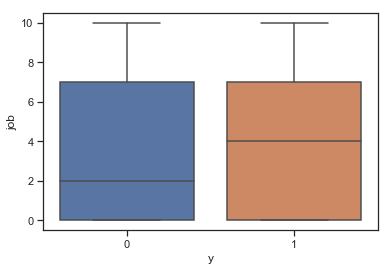

In [23]:
sns.boxplot(data_new['y'],data_new['job'])

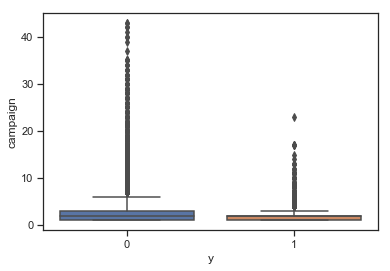

In [24]:
sns.boxplot(data_new['y'],data_new['campaign'])

# Removing Outliers

In [25]:
def remove_outliers(data, column , minimum, maximum):
    col_values = data[column].values
    data[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return data

In [26]:
min_val = data_new["duration"].min()
max_val = 1500
data_new = remove_outliers(data=data_new, column='duration' , minimum=min_val, maximum=max_val)

min_val = data_new["age"].min()
max_val = 80
data_new = remove_outliers(data=data_new, column='age' , minimum=min_val, maximum=max_val)

min_val = data_new["campaign"].min()
max_val = 6
data_new = remove_outliers(data=data_new, column='campaign' , minimum=min_val, maximum=max_val)

# Deleting the Unnecessary Columns

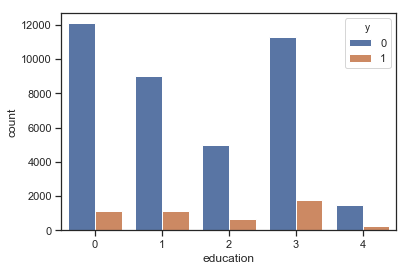

In [27]:
sns.countplot(x='education',hue='y',data=data_new)

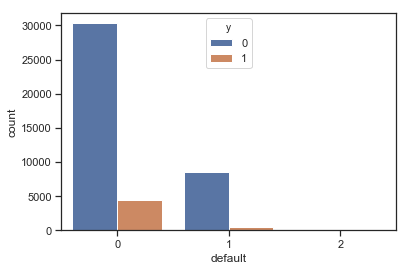

In [28]:
sns.countplot(x='default',hue='y',data=data_new)

In [29]:
data_new = data_new.drop('default',axis=1)          #As it skewed to 0 so drop this

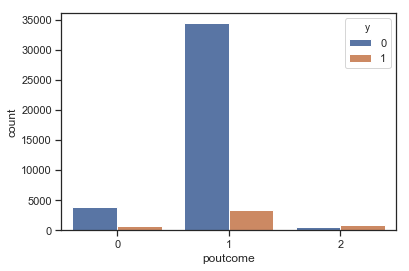

In [30]:
sns.countplot(x='poutcome',hue='y',data=data_new)

In [31]:
#So many exstint value...( also Dropped)
data_new = data_new.drop('poutcome',axis=1)

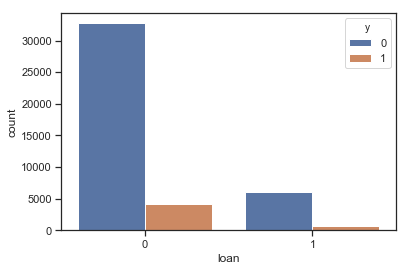

In [32]:
sns.countplot(x='loan',hue='y',data=data_new)

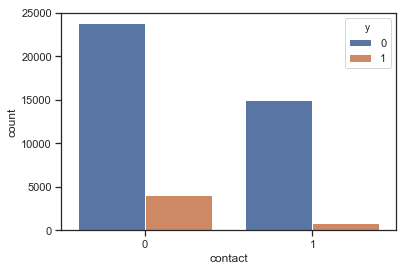

In [33]:
sns.countplot(x='contact',hue='y',data=data_new)

In [34]:
data_new = data_new.drop('contact',axis=1)

In [35]:
data_new = data_new.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)

In [36]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43748 entries, 0 to 4118
Data columns (total 13 columns):
age            43748 non-null float64
job            43748 non-null int32
marital        43748 non-null int32
education      43748 non-null int32
housing        43748 non-null int32
loan           43748 non-null int32
month          43748 non-null int32
day_of_week    43748 non-null int32
duration       43748 non-null float64
campaign       43748 non-null float64
pdays          43748 non-null int64
previous       43748 non-null int64
y              43748 non-null int32
dtypes: float64(3), int32(8), int64(2)
memory usage: 4.6 MB


In [37]:
data_new.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,y
0,56.0,3,1,0,0,0,6,1,261.0,1.0,999,0,0
1,57.0,7,1,1,0,0,6,1,149.0,1.0,999,0,0
2,37.0,7,1,1,1,0,6,1,226.0,1.0,999,0,0
3,40.0,0,1,0,0,0,6,1,151.0,1.0,999,0,0
4,56.0,7,1,1,0,1,6,1,307.0,1.0,999,0,0


In [38]:
#Splitting the dataset into train test 
X = data_new.drop('y',axis = 1).values
y = data_new['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [39]:
#Putting the complete dataset in particular range 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

In [40]:
#PCA usdd to calculate the inter relation between the dataset
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [41]:
X_train.shape

(32811, 10)

In [42]:
#Apply the various models..and predict the result with best accuracy
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))

In [43]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages

LR: 0.905275615091117
LDA: 0.9016489321098096
KNN: 0.8976258427327319
Decison-Tree: 0.8736093876790658
Gaussian: 0.9000334873603324


F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 

SVM: 0.9050011877519099
RandForest: 0.9072871504930887
ADA: 0.9014658845891464


In [44]:
#It shows the Logistic Regression has the highest Accuracy and less differnce in the Train and test set .so We apply logistic Regression

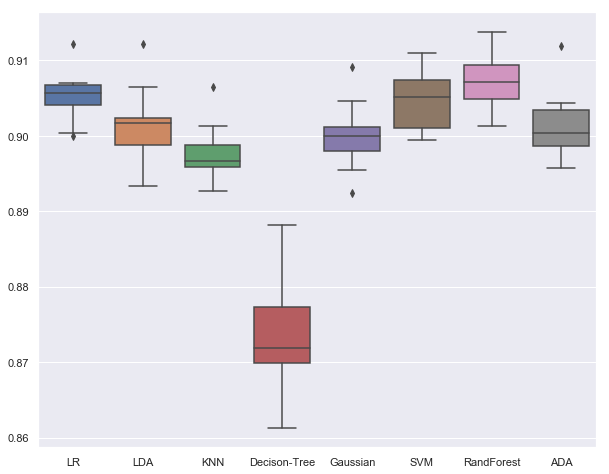

In [45]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(names,results)

In [47]:
#Predicting with the test datset

In [48]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [49]:
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [50]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions)*100)
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  89.7412453140715
Confusion Matrix : 
 [[9450  211]
 [ 911  365]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9661
           1       0.63      0.29      0.39      1276

   micro avg       0.90      0.90      0.90     10937
   macro avg       0.77      0.63      0.67     10937
weighted avg       0.88      0.90      0.88     10937



F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
